In [18]:
# %pip install --upgrade pip
# %pip install shapiro

from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [14]:
df = pd.read_csv('../datasets/Golf_test.csv') # A, B, C 세 개 타입 골프공의 비거리 테스트 결과

df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [8]:
df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


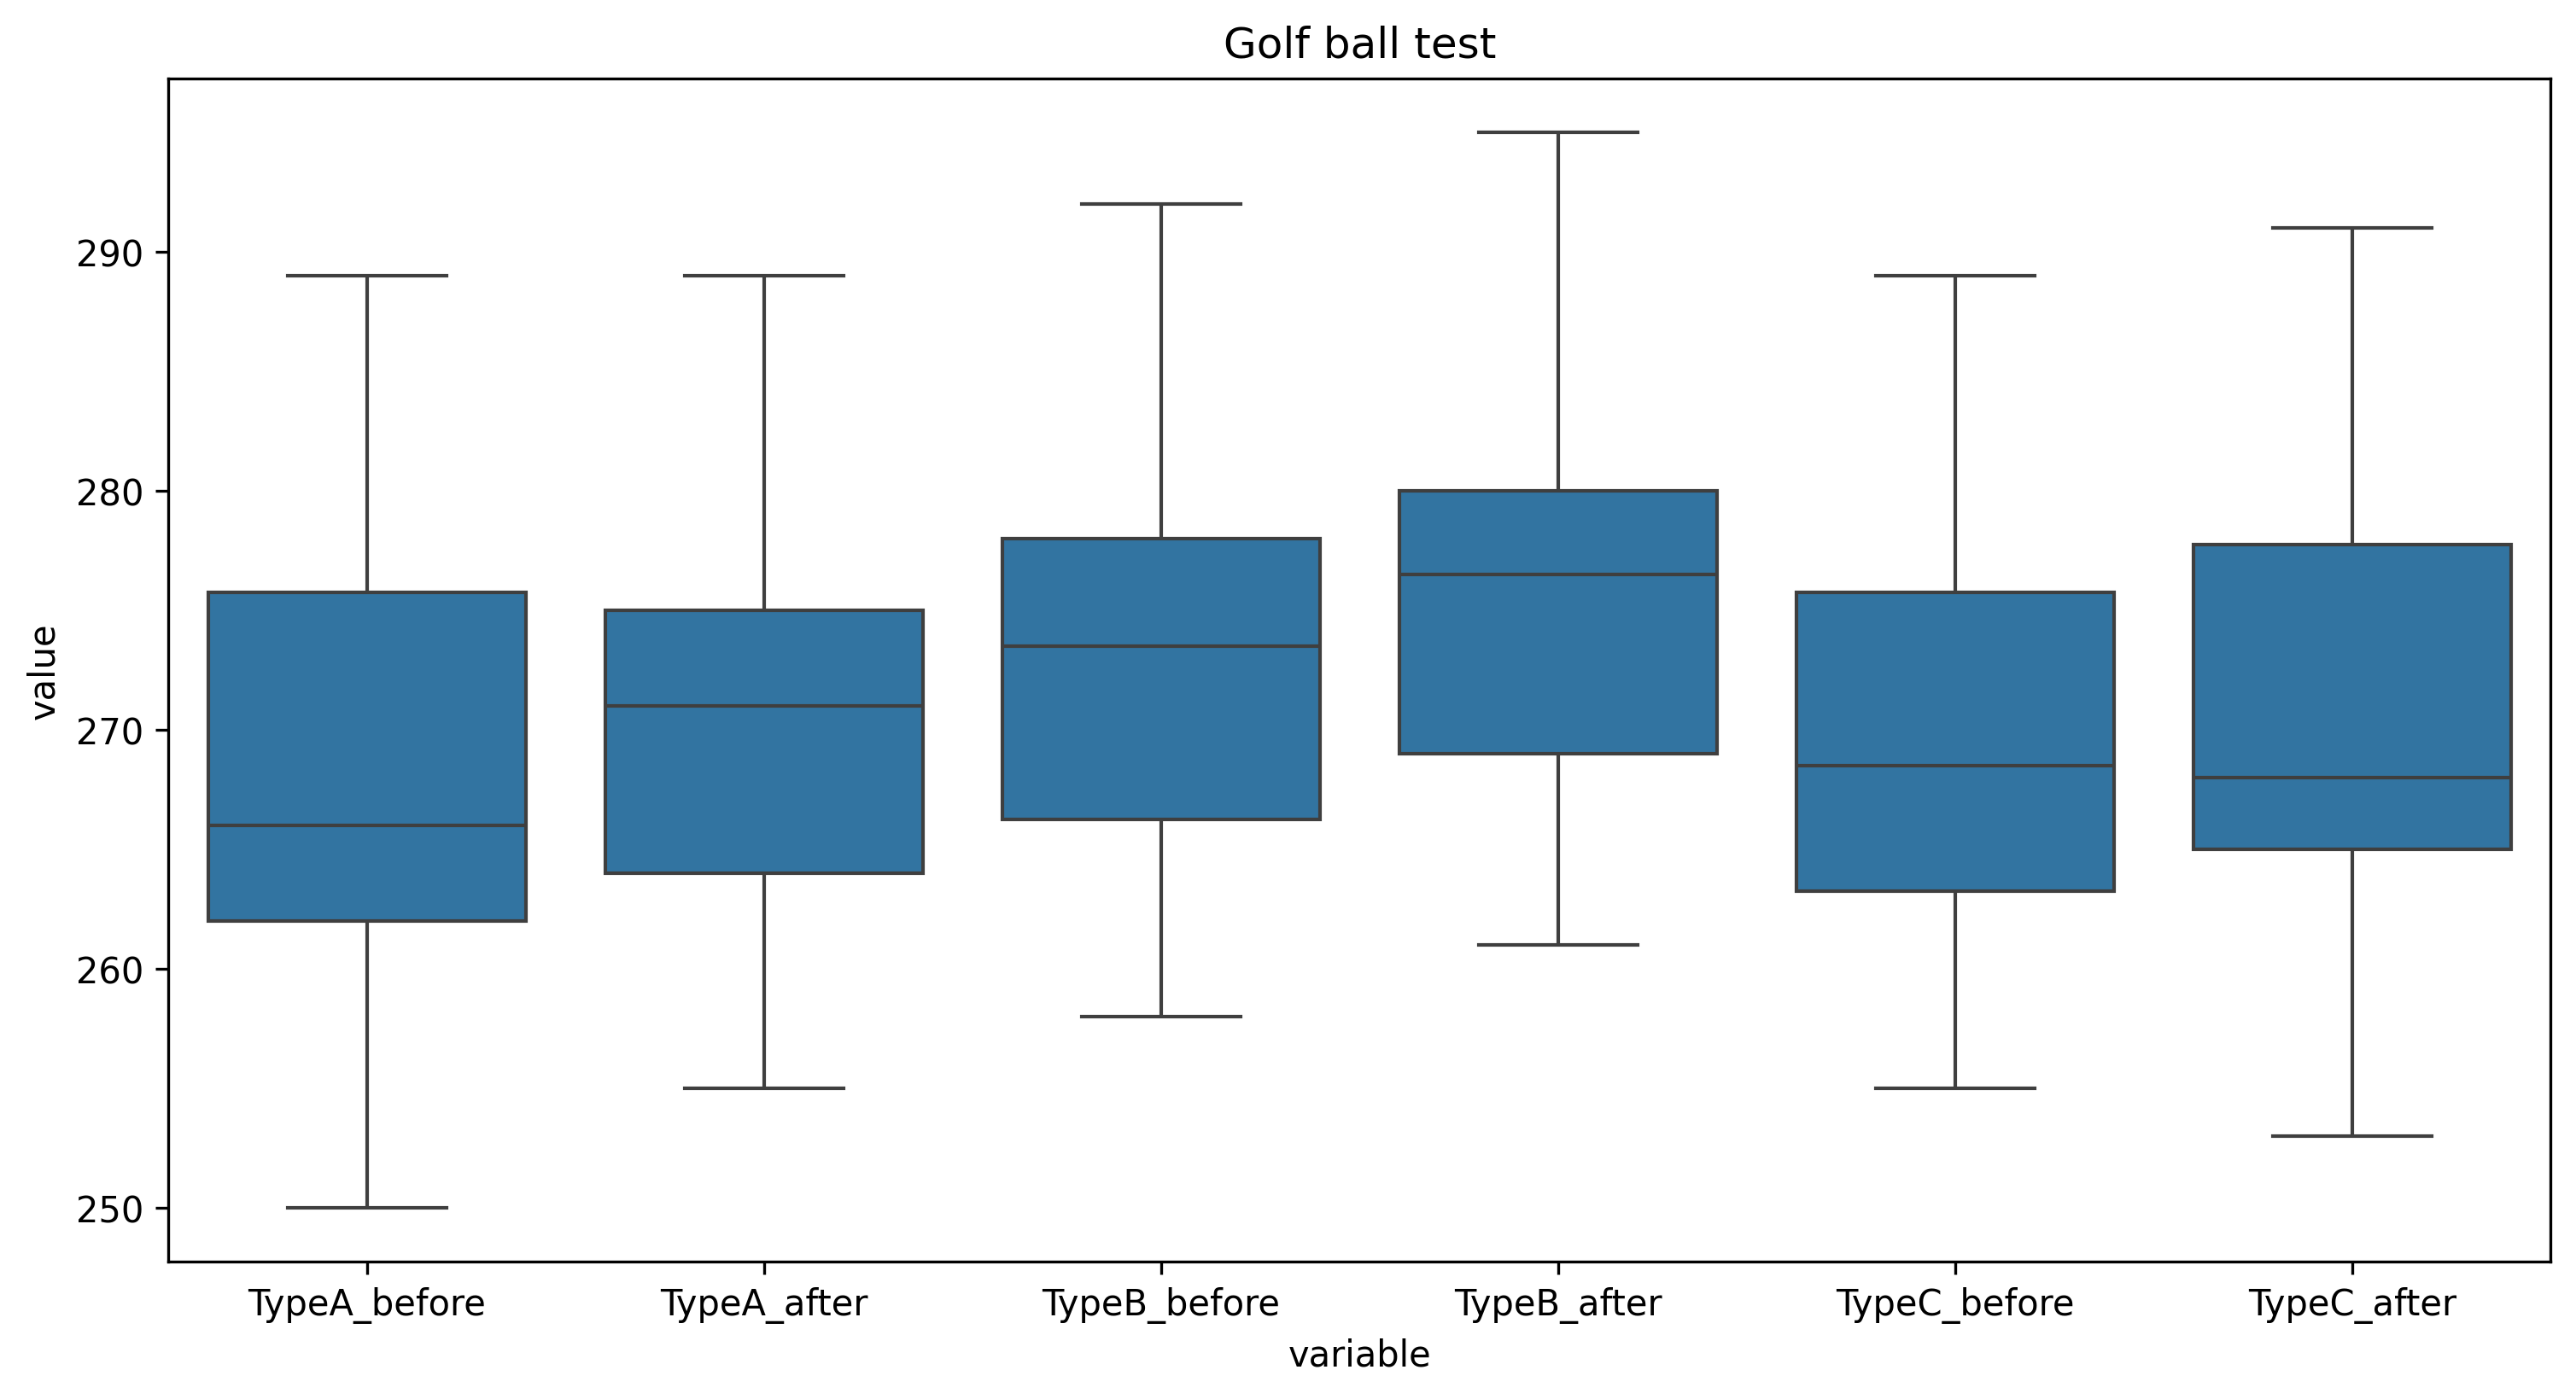

In [15]:
# 그룹별 박스 플롯 시각화

df2 = pd.melt(df)
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

In [16]:
# 데이터 정규성 검정 p-value > 0.05 초과 시 정규성 만족

print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after'])) # 정규성 만족 X

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


In [20]:
# 데이터 등분산성 검정

from scipy import stats


stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

In [21]:
# Z-test
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided')

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2825016360.py, line 2)